# Explore AnnData (.h5ad) Results
This notebook loads and inspects Scanpy results.

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd

# PATH
H5AD_PATH = "results/pbmc3k/adata_pbmc3k.h5ad"

sc.set_figure_params(figsize=(5,5), dpi=100)

adata = sc.read_h5ad(H5AD_PATH)
adata

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'results/pbmc3k/adata_pbmc3k.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# Ensure log1p metadata exists and has a 'base' key
if "log1p" not in adata.uns:
    adata.uns["log1p"] = {"base": None}
elif "base" not in adata.uns["log1p"]:
    adata.uns["log1p"]["base"] = None

# Show observation (cell) metadata
adata.obs.head()

# Show variable (gene) metadata
adata.var.head()

/Users/crispinm.lang/Documents/snakemake_project/.snakemake/conda/cddbccce339d1e09d1f49b66ef0724b3_/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/crispinm.lang/Documents/snakemake_project/.snakemake/conda/cddbccce339d1e09d1f49b66ef0724b3_/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/crispinm.lang/Documents/snakemake_project/.snakemake/conda/cddbccce339d1e09d1f49b66ef0724b3_/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/crispinm.lang/Documents/s

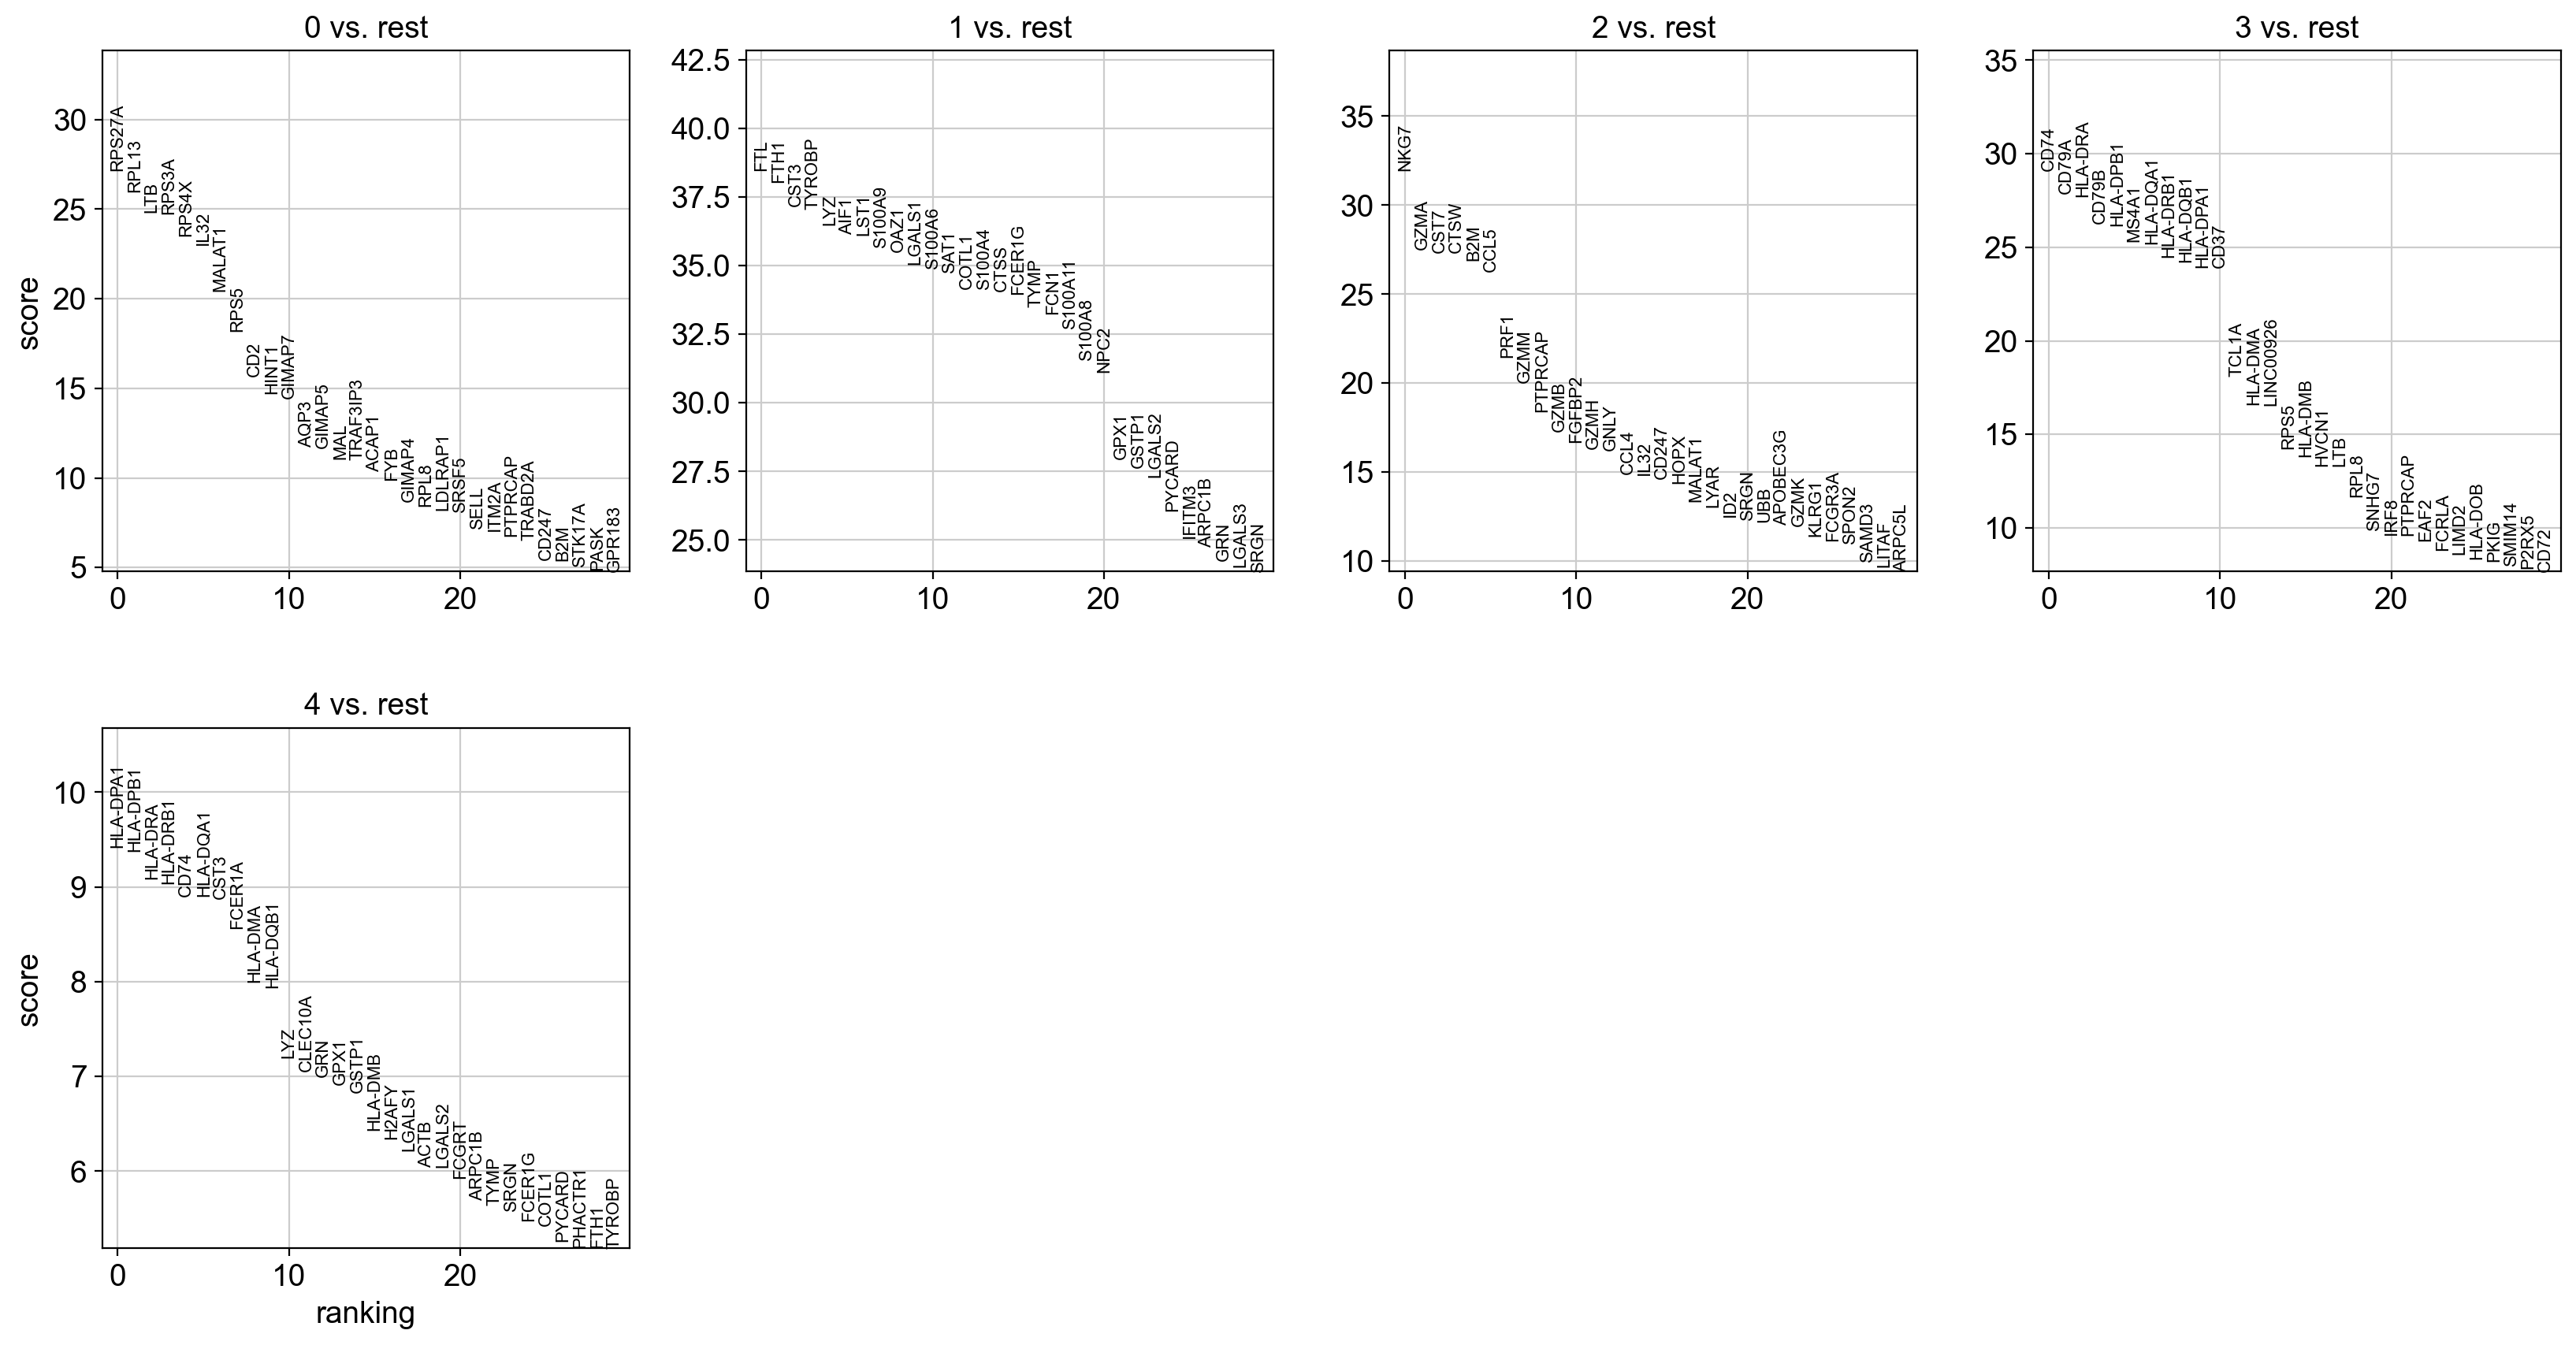

/Users/crispinm.lang/Documents/snakemake_project/.snakemake/conda/cddbccce339d1e09d1f49b66ef0724b3_/lib/python3.10/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/Users/crispinm.lang/Documents/snakemake_project/.snakemake/conda/cddbccce339d1e09d1f49b66ef0724b3_/lib/python3.10/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/Users/crispinm.lang/Documents/snakemake_project/.snakemake/conda/cddbccce339d1e09d1f49b66ef0724b3_/lib/python3.

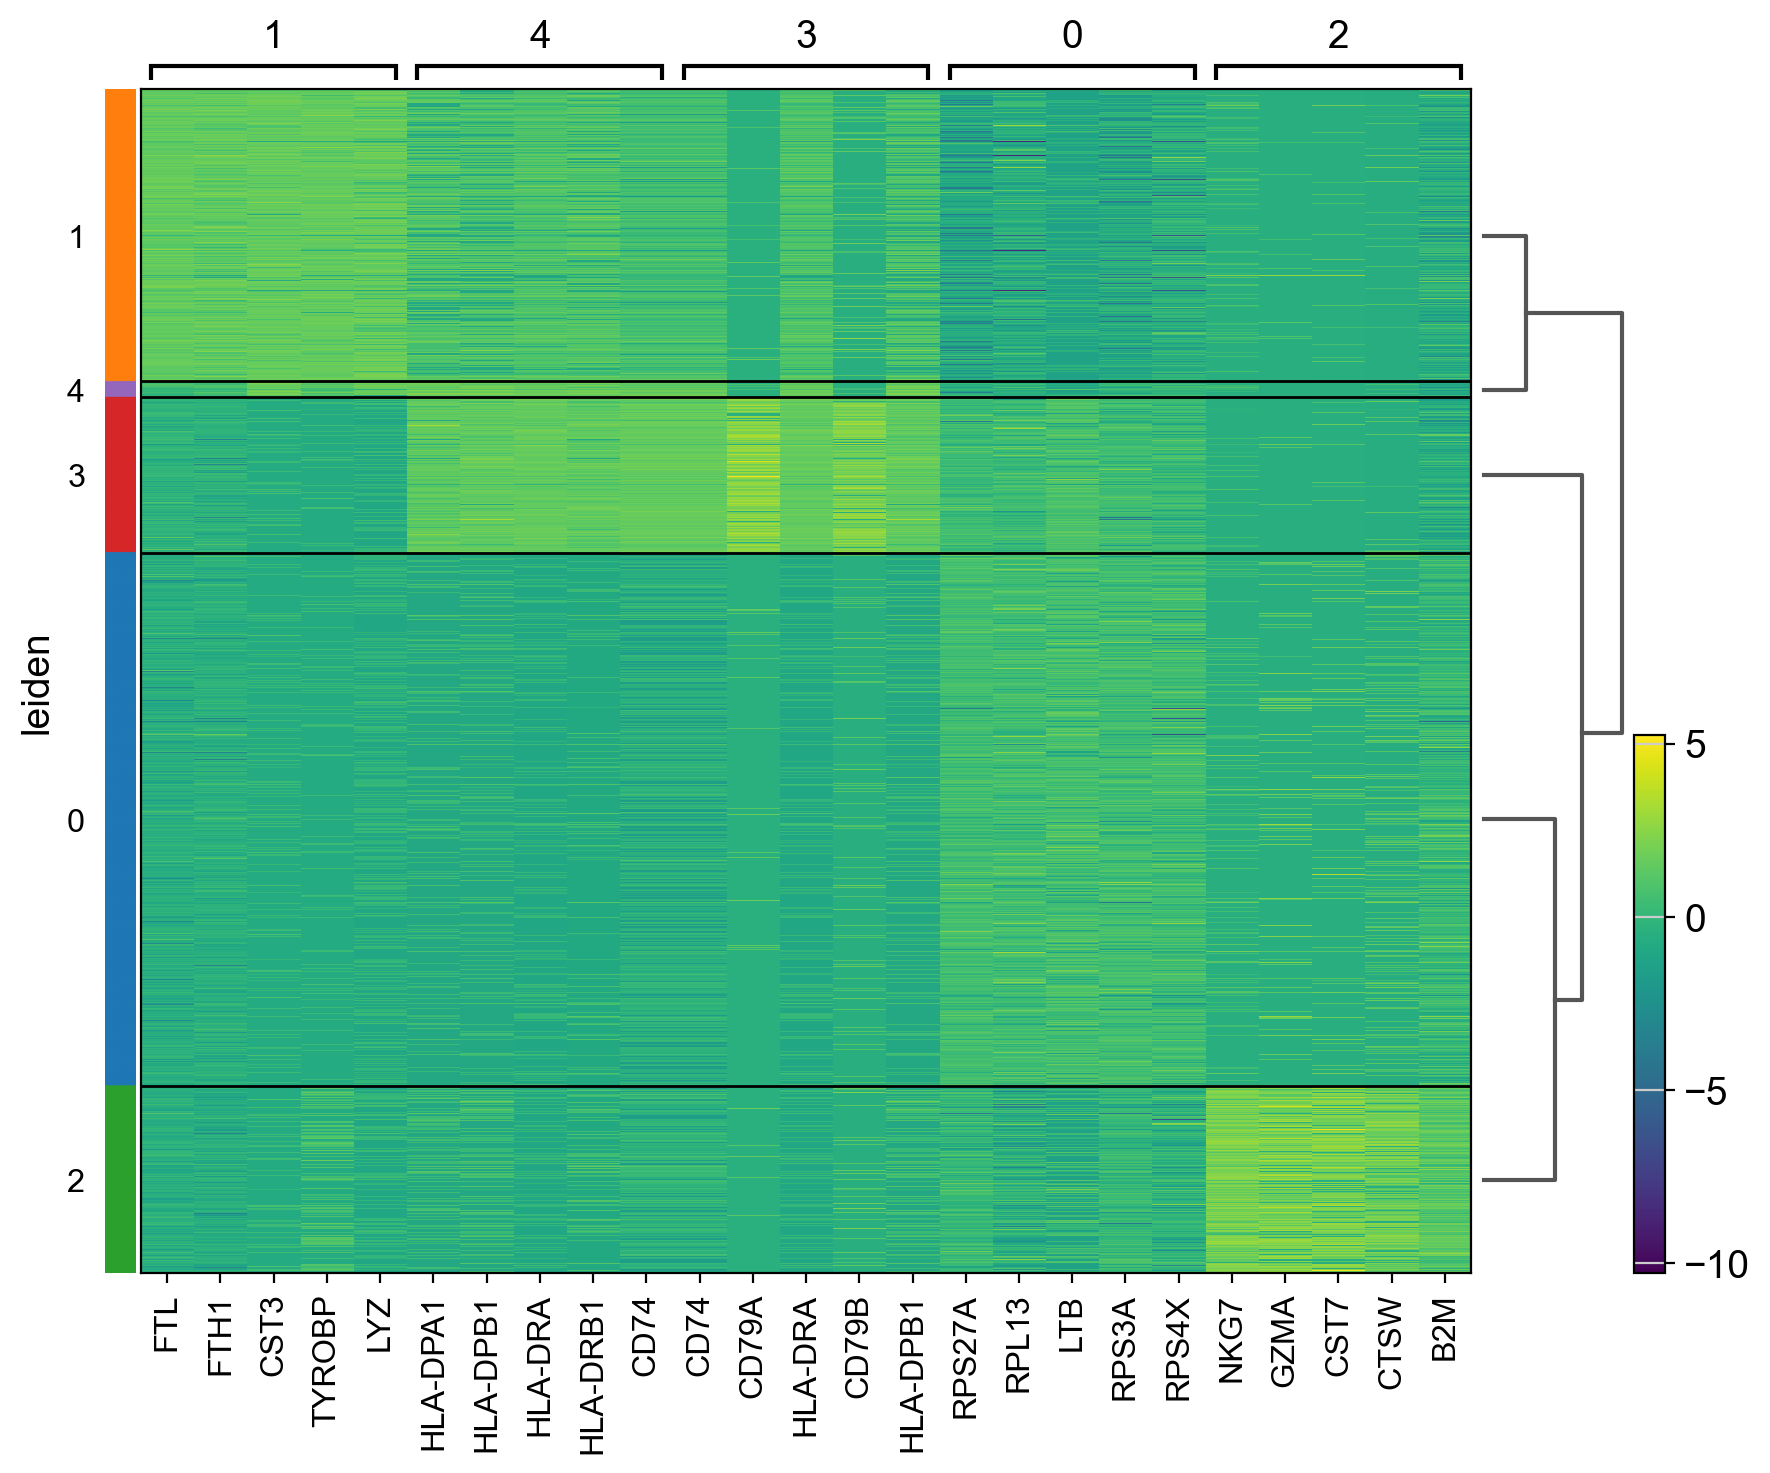

In [ ]:
sc.tl.rank_genes_groups(
    adata,
    groupby="leiden",
    method="wilcoxon",
    n_genes=50
)

# Show top 20 genes per cluster as a summary figure
sc.pl.rank_genes_groups(adata, n_genes=30, sharey=False)

marker_names = pd.DataFrame(adata.uns["rank_genes_groups"]["names"])
marker_names.head(10)

sc.pl.rank_genes_groups_heatmap(
    adata,
    n_genes=5,
    groupby="leiden",
    figsize=(10, 8),
    dendrogram=True
)

/Users/crispinm.lang/Documents/snakemake_project/.snakemake/conda/cddbccce339d1e09d1f49b66ef0724b3_/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/crispinm.lang/Documents/snakemake_project/.snakemake/conda/cddbccce339d1e09d1f49b66ef0724b3_/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


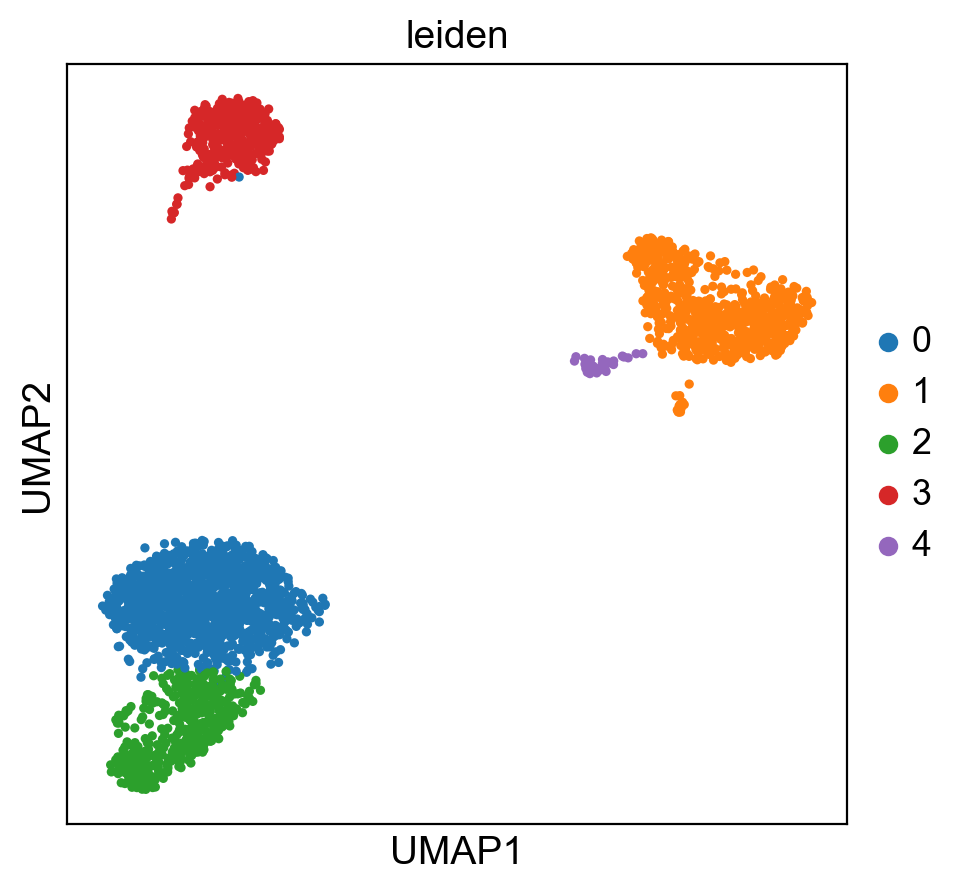

<Figure size 500x500 with 0 Axes>

In [ ]:
# UMAP colored by Leiden clusters (if present)
if "leiden" in adata.obs.columns:
    sc.pl.umap(adata, color="leiden")
    plt.savefig('new_plot.pdf')
else:
    print("No 'leiden' column found in adata.obs")

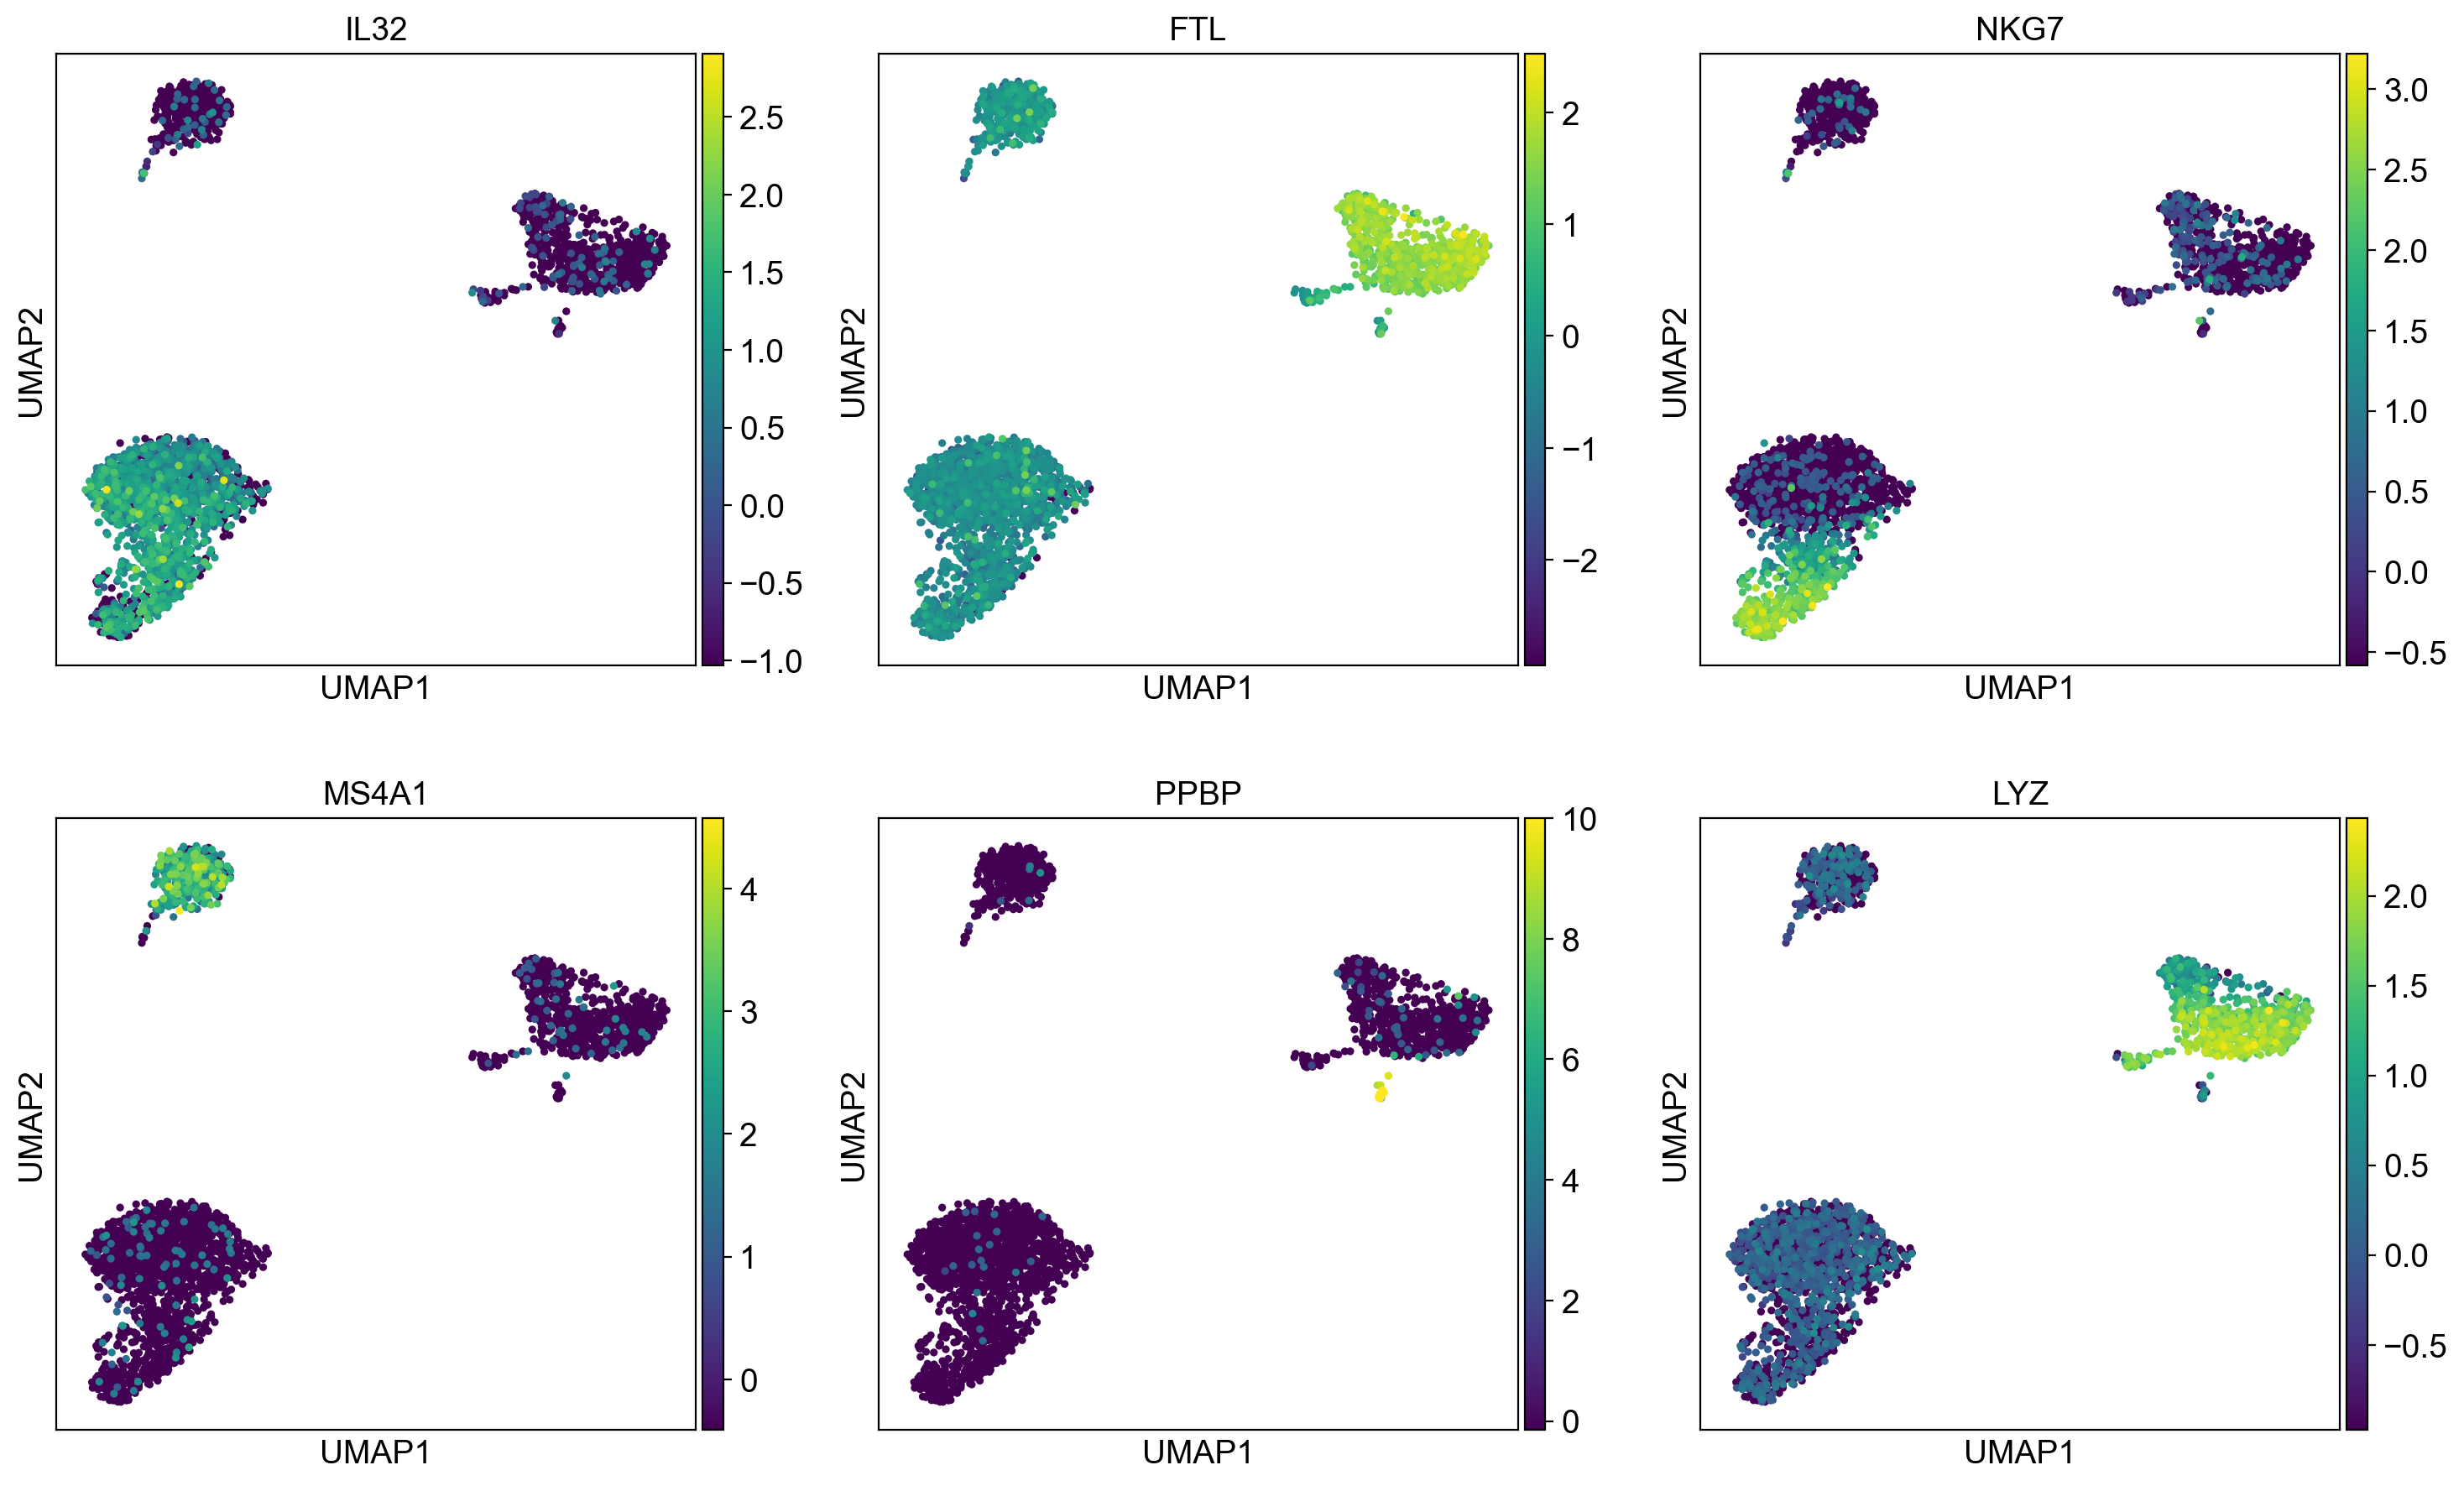

In [ ]:
genes_to_plot = ["IL32", "FTL", "NKG7", "MS4A1", "PPBP", "LYZ"]

sc.pl.umap(
    adata,
    color=genes_to_plot,
    ncols=3,
    save="_marker_genes.pdf"
)